In [1]:
%matplotlib inline
from __future__ import division
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import struct
import pickle

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
pd.options.display.max_columns = 999

In [4]:
import sys
sys.path.append('../../src')

In [5]:
from utils import FloatConvert32, FloatConvert64
from microssembly import Microssembly

In [6]:
FloatConvert32.float_to_bin(3.14)

'01000000010010001111010111000011'

In [7]:
FloatConvert32.bin_to_float(FloatConvert32.float_to_bin(3.14)), len(FloatConvert32.float_to_bin(3.14))

(3.140000104904175, 32)

In [8]:
FloatConvert64.bin_to_float(FloatConvert64.float_to_bin(3.14)), len(FloatConvert64.float_to_bin(3.14))

(3.14, 64)

In [9]:
import microssembly
mssembly = Microssembly()

In [10]:
data = [1, 2, 3, 4, 5]
mssembly.load_data(data)

In [11]:
prog = ([
    '000100000',
    '100010', 
    '000100010',
    '100010',
    '000100100',
    '100010',
    '000100110',
    '100010',
    '000101000',
    '100010',
    '010100000'
])

In [12]:
mssembly.run(''.join(prog))

['load [0] [0]',
 'max [1] [0]',
 'load [1] [0]',
 'max [1] [0]',
 'load [2] [0]',
 'max [1] [0]',
 'load [3] [0]',
 'max [1] [0]',
 'load [4] [0]',
 'max [1] [0]',
 'unload [0] [0]']

In [13]:
mssembly.out_memory[0], np.max(data)

(5.0, 5)

In [14]:
from simple_max import find_best_model, eval_individual

pop, hof, _ = find_best_model(ngen=3000, pop_size=1000, mutpb=0.5, indpb=0.1)

In [32]:
with open('/Users/vorl/projects/smu/models/MSDS6306/simple_max.pkl', 'rb') as f:
    hof = pickle.load(f)

In [33]:
eval_individual(''.join(map(str, hof[0])))

(0.84,)

In [34]:
mssembly = microssembly.Microssembly()
data = np.random.randint(np.random.randint(1000, size=1)[0], size=4)
mssembly.reset()
mssembly.load_data(data.tolist())
trace = mssembly.run(''.join(map(str, hof[0])))
data, mssembly.out_memory

(array([ 21, 468, 350, 584]),
 array([584.,   0.,   0.,   0.,   0.,  21.,   0.,   0., 585.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]))

In [35]:
trace

['unload [1] [9]',
 'max [1] [1]',
 'load [3] [0]',
 'unload [1] [4]',
 'unload [1] [1]',
 'load [2] [1]',
 'max [0] [0]',
 'max [1] [0]',
 'ignore',
 'div [1] [0]',
 'inc [0]',
 'max [1] [1]',
 'load [8] [0]',
 'ignore',
 'dec [1]',
 'load [11] [0]',
 'inc [1]',
 'dec [0]',
 'add [1] [0]',
 'stop-ignore',
 'inc [1]',
 'max [0] [1]',
 'load [0] [1]',
 'max [1] [0]',
 'unload [1] [5]',
 'load [0] [1]',
 'stop-ignore',
 'unload [0] [0]',
 'inc [1]',
 'inc [0]',
 'max [1] [1]',
 'unload [0] [8]']

In [36]:
x = []
x_hat = []
y = []

for i in range(50):
    mssembly = microssembly.Microssembly()
    data = np.random.randint(np.random.randint(1000, size=1)[0], size=4)
    mssembly.reset()
    mssembly.load_data(data.tolist())
    trace = mssembly.run(''.join(map(str, hof[0])))
    data, mssembly.out_memory
    y.append(i)
    x.append(np.max(data))
    x_hat.append(mssembly.out_memory[0])

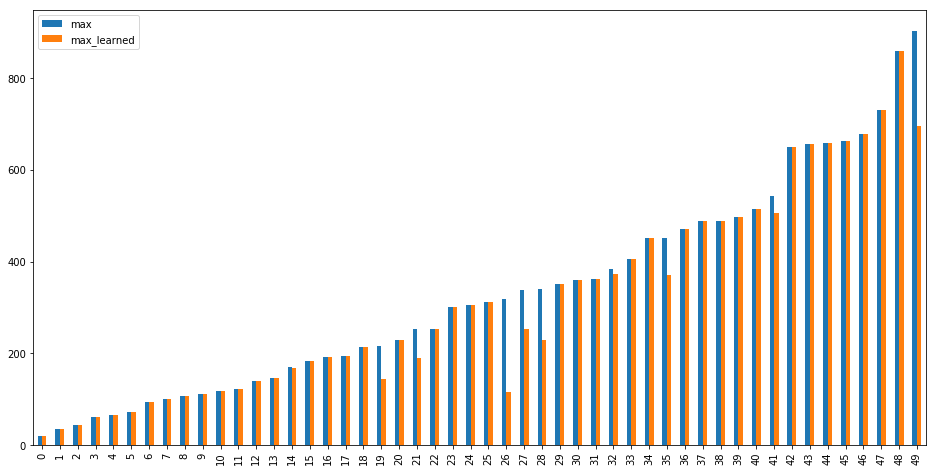

In [37]:
import pandas as pd
df = pd.DataFrame({'max': x, 'max_learned': x_hat}, index=y)
df.sort_values('max').reset_index(drop=True).plot.bar()

In [38]:
''.join(map(str, hof[0]))

'111101011100100101000110000000100110000001011010001011000100010010110010011011000100110010010111010100100011111000011000001101011100011011011101010110110110100111000101101001001111010100001000010001000011000101101010110101000000010000101111101001001010000000001010110100100011110011100000010101000011'

In [31]:
with open('/Users/vorl/projects/smu/models/MSDS6306/simple_max.pkl', 'wb') as f:
    pickle.dump(hof, f)